In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics

In [4]:
data = pd.read_csv('data\diamonds.csv')

In [5]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
data.shape

(53940, 11)

In [7]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [8]:
data['Unnamed: 0']

0            1
1            2
2            3
3            4
4            5
         ...  
53935    53936
53936    53937
53937    53938
53938    53939
53939    53940
Name: Unnamed: 0, Length: 53940, dtype: int64

In [9]:
data = data.drop(['Unnamed: 0'],axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [11]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
data.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

<img src='https://www.diamonds.pro/wp-content/uploads/2020/02/Gold-sample-1.png'>

In [12]:
count_list = ['cut','color','clarity']
for i in count_list:
    print(data[i].value_counts())
    print('#'*30)

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
##############################
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
##############################
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
##############################


In [13]:
data = data.drop(data[data.x == 0].index)
data = data.drop(data[data.y == 0].index)
data = data.drop(data[data.z == 0].index)
data.shape

(53920, 10)

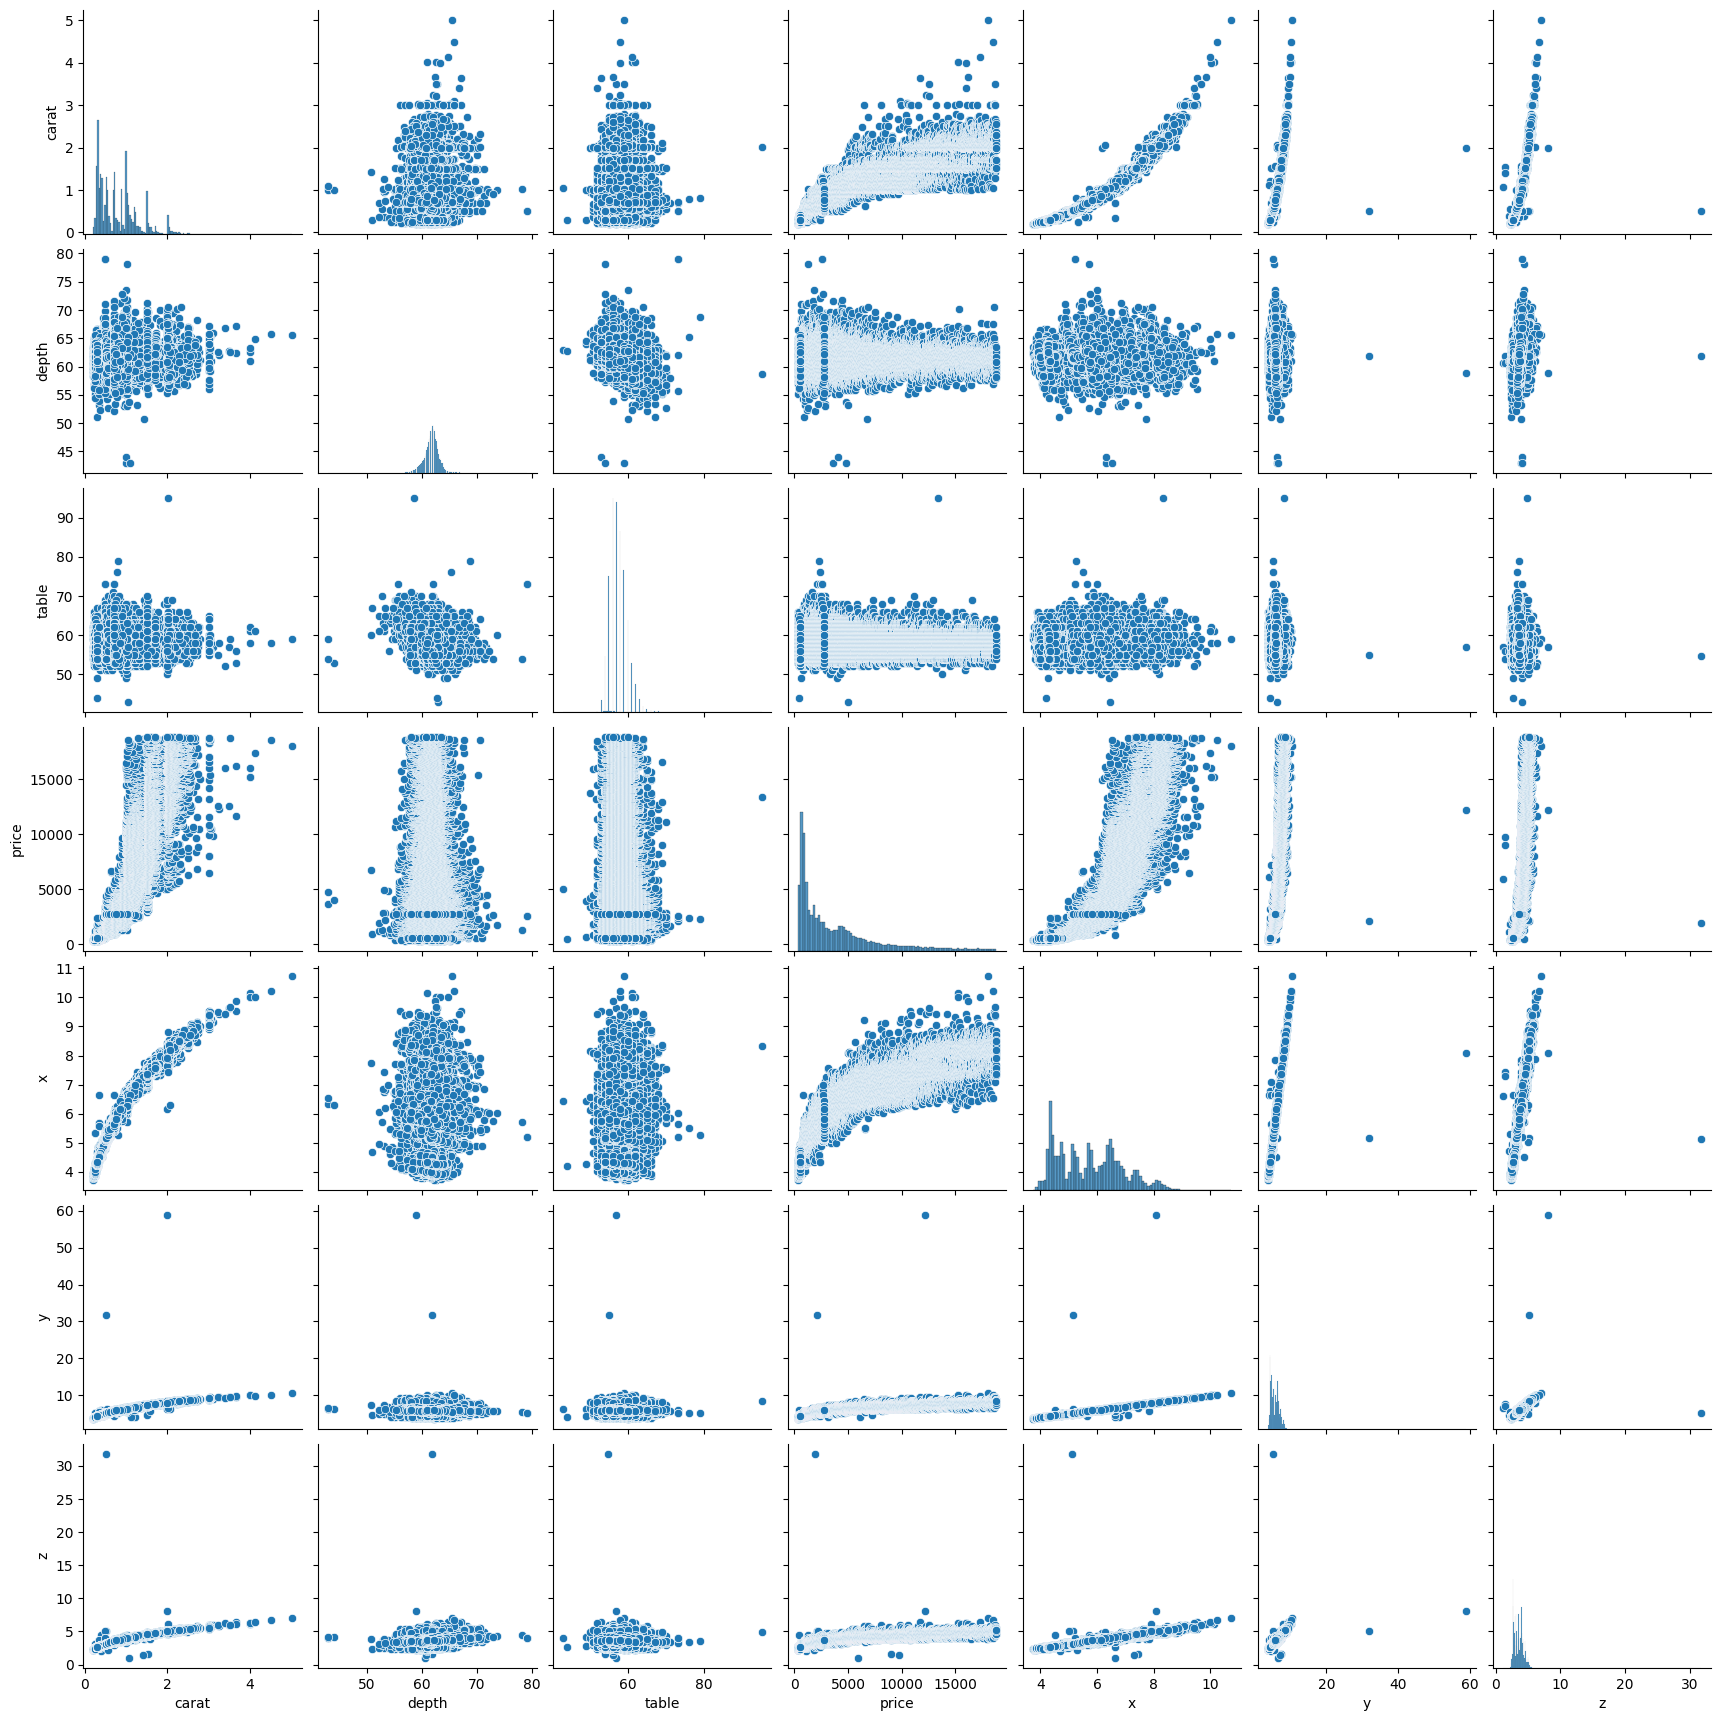

In [34]:
sns.pairplot(data)

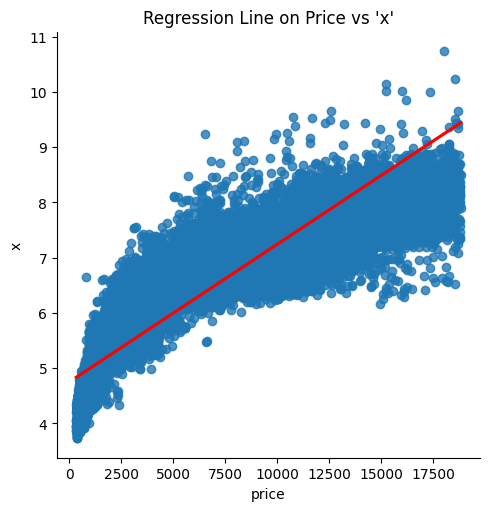

In [50]:
sns.lmplot(data,x='price',y='x', line_kws={'color': 'red'})
plt.title("Regression Line on Price vs 'x'")
plt.show()

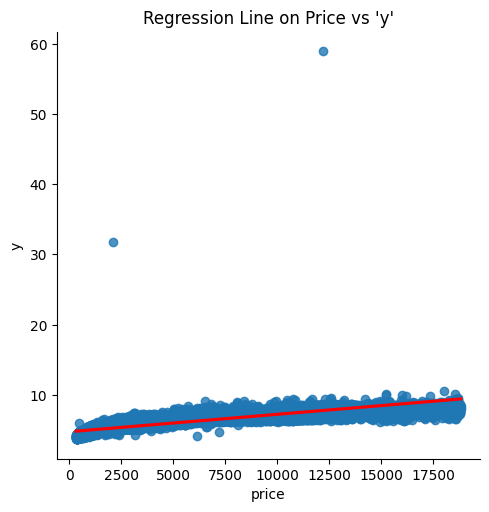

In [39]:
sns.lmplot(data,x='price',y='y', line_kws={'color': 'red'})
plt.title("Regression Line on Price vs 'y'")
plt.show()

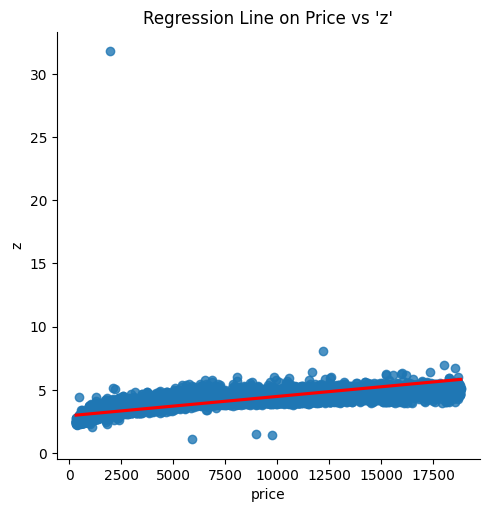

In [40]:
sns.lmplot(data,x='price',y='z', line_kws={'color': 'red'})
plt.title("Regression Line on Price vs 'z'")
plt.show()

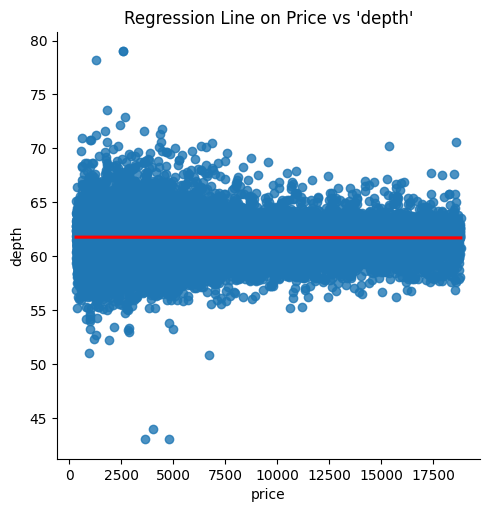

In [41]:
sns.lmplot(data,x='price',y='depth', line_kws={'color': 'red'})
plt.title("Regression Line on Price vs 'depth'")
plt.show()

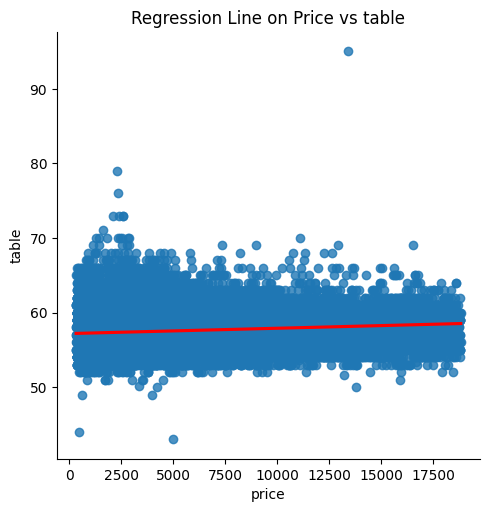

In [42]:
sns.lmplot(data,x='price',y='table', line_kws={'color': 'red'})
plt.title("Regression Line on Price vs table")
plt.show()

In [14]:
data = data[(data.depth < 75) & (data.depth > 45)]
data = data[(data.table < 80) & (data.table > 40)]
data = data[(data.x < 30)]
data = data[(data.y < 30)]
data = data[(data.z < 30) & (data.z > 2)]
data.shape

(53907, 10)

In [15]:
s = data.dtypes == 'object'
object_col = list(s[s].index)
print(f'Categorical variable : {object_col}')

Categorical variable : ['cut', 'color', 'clarity']


<Axes: xlabel='color', ylabel='price'>

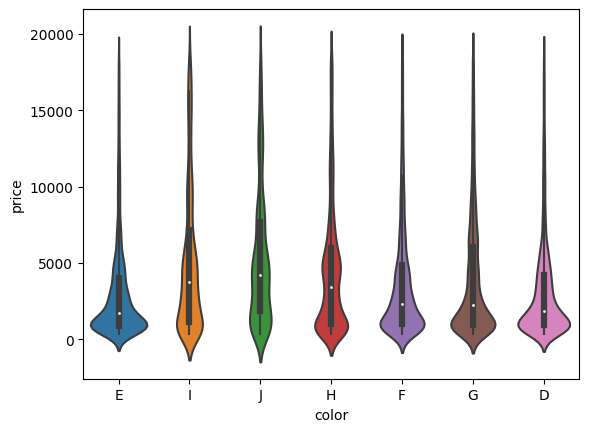

In [65]:
sns.violinplot(data=data,x='color',y='price')

<Axes: xlabel='cut', ylabel='price'>

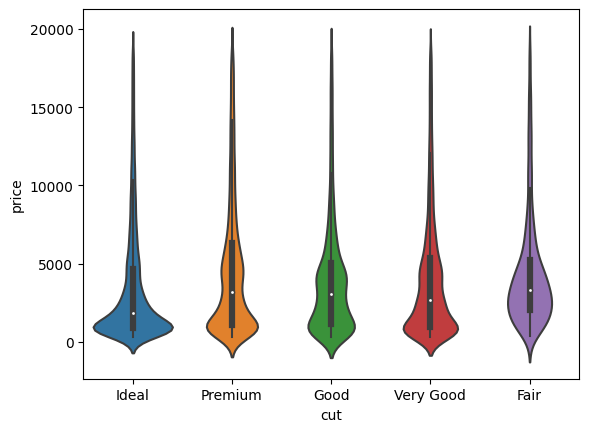

In [66]:
sns.violinplot(data=data,x='cut',y='price')

<Axes: xlabel='clarity', ylabel='price'>

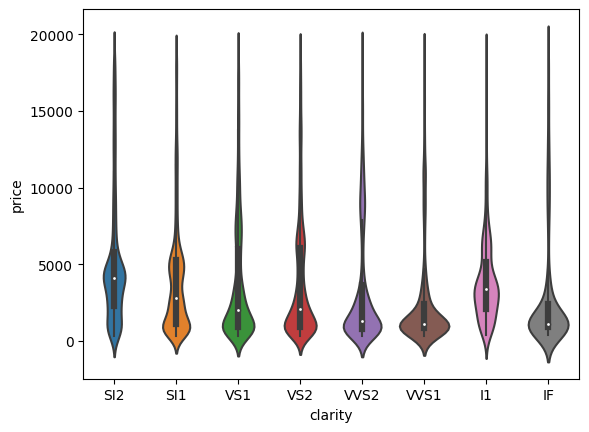

In [67]:
sns.violinplot(data=data,x='clarity',y='price')

## Model Building


###Steps involved in Model Building

1. Setting up features and target
2. Build a pipeline of standard scalar and model for five different regressors.
3. Fit all the models on training data
4. Get mean of cross-validation on the training set for all the models for negative root mean square error
5. Pick the model with the best cross-validation score
6. Fit the best model on the training set and get

In [21]:
# # Make copy to avoid changing original data
label_data = data.copy()

# # Apply label encoder to each column with categorical data
# label_encoder = LabelEncoder()
# for col in object_col:
#     label_data[col] = label_encoder.fit_transform(label_data[col])

label_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [19]:
# #correlation matrix
# cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
# corrmat= label_data.corr()
# f, ax = plt.subplots(figsize=(12,12))
# sns.heatmap(corrmat,cmap=cmap,annot=True,)

####Points to notice:

* "x", "y" and "z" show a high correlation to the target column.
* "depth", "cut" and "table" show low correlation. We could consider dropping but let's keep it.

In [22]:
# assigning the feature as X and target as y
X = label_data.drop(['price'],axis=1)
y = label_data['price']

In [27]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [28]:
categorical_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [16]:
# Define the custom ranking for each ordinal variable
cut = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [29]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[cut,color,clarity])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40430, 9), (13477, 9), (40430,), (13477,))

In [37]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [39]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [41]:
regression.coef_

array([ 5222.85438148,   343.6445448 ,   -39.62124724, -1172.92163853,
        3776.83240768, -3703.56802713,   148.68104409,  -549.0341369 ,
         817.96419357])

In [42]:
regression.intercept_

3939.702151867424

In [40]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [46]:
models = {
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'DecissionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'KNeighborsRegressor' : KNeighborsRegressor(),
    'XGBRegressor': XGBRegressor()
}

trained_model_list = []
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #make prediction
    y_pred = model.predict(X_test)

    mae, rmse, r2_square = evaluate_model(true=y_test, predicted=y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('Model Training perfomance')
    print(f'RMSE : {rmse}')
    print(f"MAE : {mae}")
    print(f"R2 SCORE : {r2_square*100}")

    r2_list.append(r2_square)

    print('='*35)
    print('\n')


LinearRegression
Model Training perfomance
RMSE : 1186.811311873969
MAE : 794.4715048912947
R2 SCORE : 91.02156509204112




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.529e+09, tolerance: 6.455e+07
  model = cd_fast.enet_coordinate_descent(


Lasso
Model Training perfomance
RMSE : 1186.8769782917943
MAE : 793.9015186103627
R2 SCORE : 91.02057150870904


Ridge
Model Training perfomance
RMSE : 1186.6869059581888
MAE : 794.4834079358722
R2 SCORE : 91.02344729835876


Elasticnet
Model Training perfomance
RMSE : 1553.9630269685897
MAE : 1056.6044714113987
R2 SCORE : 84.60716381957607


DecissionTreeRegressor
Model Training perfomance
RMSE : 736.5885786484174
MAE : 352.38461823848036
R2 SCORE : 96.54150425785653


RandomForestRegressor
Model Training perfomance
RMSE : 543.3447253855192
MAE : 267.3990599221955
R2 SCORE : 98.11813616954373


KNeighborsRegressor
Model Training perfomance
RMSE : 705.5438120941174
MAE : 368.6580841433553
R2 SCORE : 96.82688904199493


XGBRegressor
Model Training perfomance
RMSE : 542.8754452546669
MAE : 274.95447683790775
R2 SCORE : 98.12138545086691




In [47]:
model_list

['LinearRegression',
 'Lasso',
 'Ridge',
 'Elasticnet',
 'DecissionTreeRegressor',
 'RandomForestRegressor',
 'KNeighborsRegressor',
 'XGBRegressor']